01. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\polly\Documents\Instacart Basket Analysis'
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_derived_more.pkl'))    

In [28]:
# Check shape of dataframe
df_ords_prods_merge.shape

(32404859, 24)

In [21]:
# Check output of dataframe
df_ords_prods_merge.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


02. Creating bar charts

<AxesSubplot:>

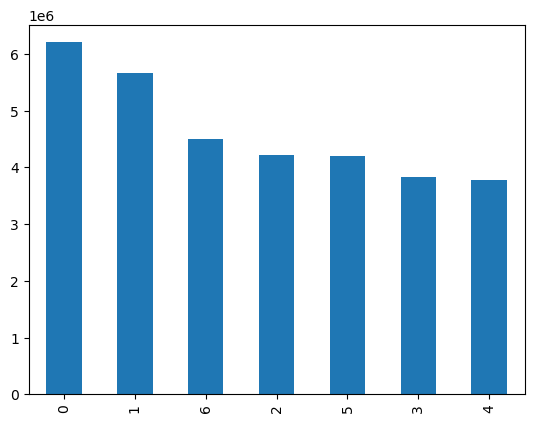

In [4]:
# Create bar chart of orders_day_of_week column
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

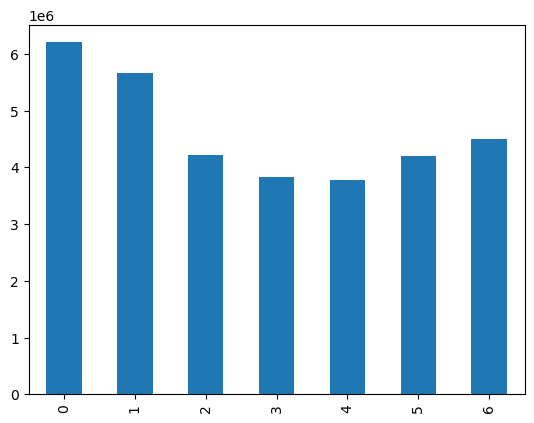

In [5]:
# Sort and save above chart by day of week 
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

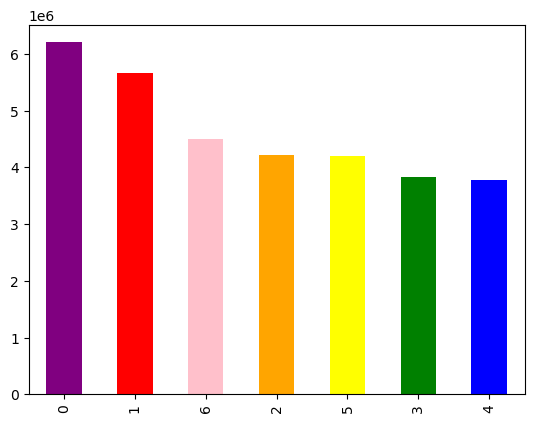

In [8]:
# Add colours to bar object
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

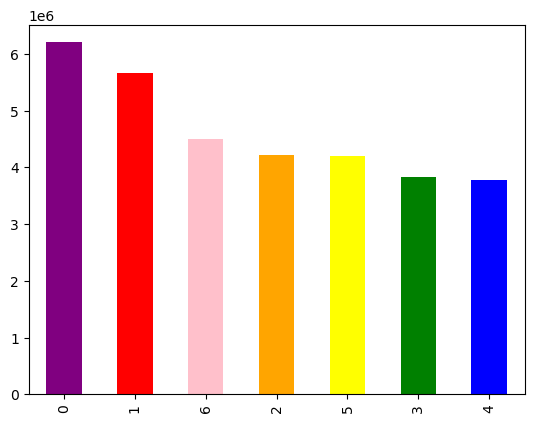

In [10]:
# Call 'bar' object
bar.figure

In [12]:
# Save 'bar' object to file
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_1_orders_dow.png'))

03. Creating histograms and scatterplots

<AxesSubplot:ylabel='Frequency'>

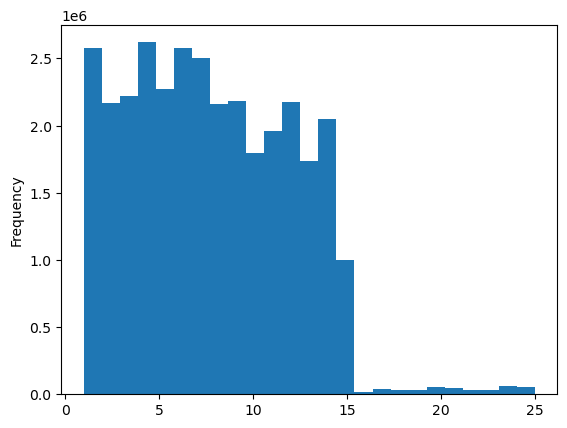

In [14]:
# Create histogram of 'prices' column
df_ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

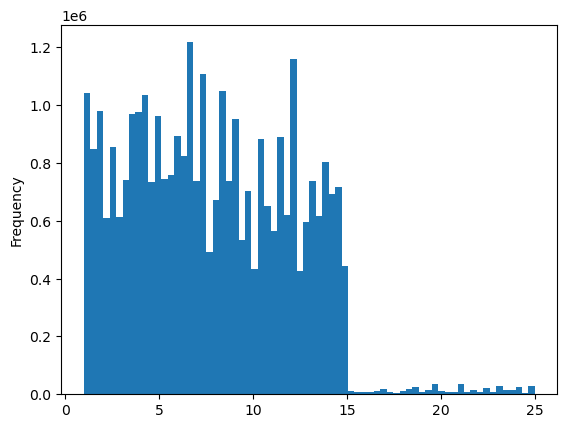

In [17]:
# Create histogram of 'prices' column with 70 bins
df_ords_prods_merge['prices'].plot.hist(bins = 70)

<AxesSubplot:ylabel='Frequency'>

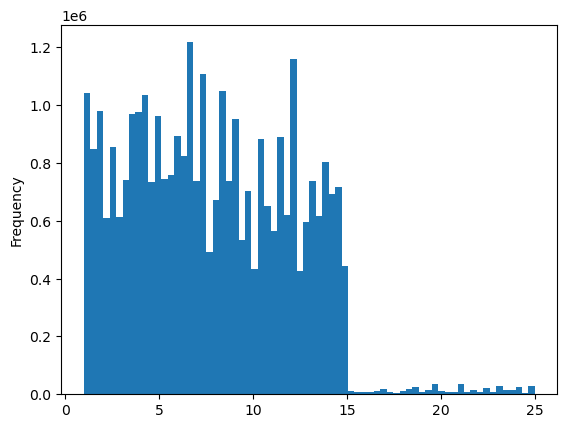

In [18]:
# Save histogram as object 'hist'
df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [19]:
# Save 'hist' object to file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

04. Creating a data sample and line chart

In [33]:
# Create a list of random floating numbers between 0 and 1, and store as boolean value in new list 'dev' with a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [32]:
# Check values of 'dev' list
dev

array([False,  True, False, ...,  True,  True,  True])

In [36]:
# Split 'dev' list into two dataframes 'big' and 'small'
big = df_ords_prods_merge[dev]
small = df_ords_prods_merge[~dev]

In [38]:
# Check length of main dataframe
len(df_ords_prods_merge)

32404859

In [39]:
# Check length of 'big' & small' dataframes
len(big) + len(small)

32404859

In [40]:
# Create new dataframe 'df_2' with 2 columns from 'small' dataframe
df_2 = small[['orders_day_of_week', 'prices']]

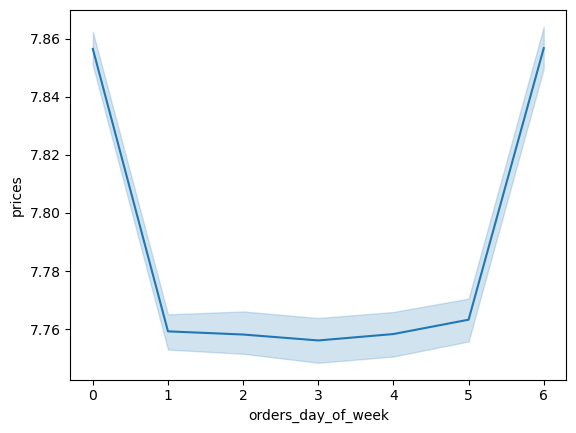

In [41]:
# Create line chart of sample dataframe 'df_2'
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [42]:
# Save 'line' object to file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))

In [44]:
# Create new dataframe 'df_4' with 2 columns from 'big' dataframe
df_4 = big[['orders_day_of_week', 'prices']]

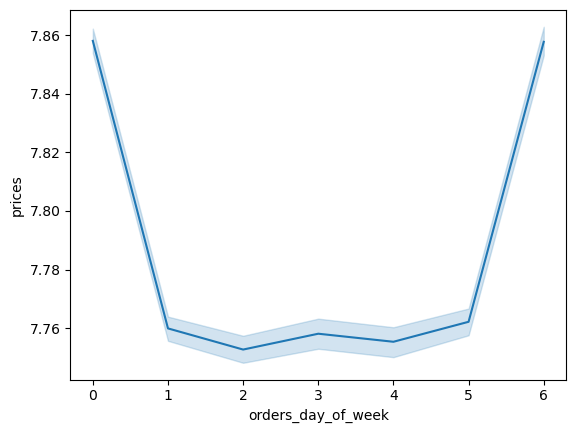

In [45]:
# Create line chart of sample dataframe 'df_4'
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')

In [46]:
# Save 'line_2' object to file
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_big.png'))

In [47]:
df_ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 24 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_time_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int8    
 11  department_id                  int8    
 12  prices                         float32 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  busiest_day_new                object  
 17  busiest_period_of_day    